**Análise de dados com Python e Pandas**

In [1]:
#import the libraries 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("seaborn")

from google.colab import files 

ModuleNotFoundError: No module named 'google'

In [2]:
# upload AdventureWorks.xlsx 
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# create a dataframe
df = pd.read_excel("AdventureWorks.xlsx",parse_dates=True)

#**The archive analysis**


In [4]:
# df.info() , df.describe(), df.shape(), df.index
print(df.info(), 
      "\n","\n",df.describe(), 
      "\n","\n\n Columns of dataframe\n\n",df.columns,
      "\n","\n\n dtypes of Columns\n\n",df.dtypes,
      "\n","\n\n dataframe index \n\n",df.index, 
      "\n\n number of columns and lines",
      "\n\n",df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [5]:
# list of dataframe
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


The dataframe Analysis 

In [6]:
df_fabricante = df[{'Classe':'Classe', 'Fabricante':'Fabricante','Cor':'Cor'}]

print("Classes de produtos: ", pd.Series(df_fabricante['Classe']).unique(),"\n")

print("Fabricantes: ", pd.Series(df_fabricante['Fabricante']).unique(),"\n")

print("Cores: ", pd.Series(df_fabricante['Cor']).unique())


Classes de produtos:  ['Regular' 'Economy'] 

Fabricantes:  ['Adventure Works' 'Fabrikam, Inc.' 'Contoso, Ltd'] 

Cores:  ['Red' 'White' 'Grey' 'Black' 'Silver']


In [7]:
#  group by the data by produtos por loja, fabricante, classe, id produto, cor
tbl_Classe_Fabricante = df[['ID Loja', 'Fabricante', 'ID Produto',
                            'Produto','Cor','Classe']].groupby(
                                ['ID Loja', 'Fabricante','Produto', 'Classe', 'Cor'],sort=True)

tbl_Classe_Fabricante['ID Produto'].count()



ID Loja  Fabricante       Produto                                          Classe   Cor   
199      Adventure Works  Adventure Works Laptop15.4W M1548 Black          Regular  Black     39
                          Adventure Works Laptop15.4W M1548 Red            Regular  Red       33
         Contoso, Ltd     Headphone Adapter for Contoso Phone E130 Silver  Economy  Silver    25
                          Headphone Adapter for Contoso Phone E130 White   Economy  White     36
         Fabrikam, Inc.   Fabrikam Trendsetter 1/3'' 8.5mm X200 Black      Regular  Black     31
                          Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey       Regular  Grey      35
                          Fabrikam Trendsetter 1/3'' 8.5mm X200 White      Regular  White     24
                          Fabrikam Trendsetter 2/3'' 17mm X100 Black       Regular  Black     43
                          Fabrikam Trendsetter 2/3'' 17mm X100 Grey        Regular  Grey      41
306      Adventure Works  Adventure 

In [8]:
# group by the data by Fabricante, Produto, Classe e Cor
df_produto = df[{'Produto':'produto','Cor':'Cor','Fabricante':'Fabricante','Classe':'Classe'}]
df_produto.groupby(['Fabricante','Produto','Classe','Cor'])['Produto'].count()


Fabricante       Produto                                          Classe   Cor   
Adventure Works  Adventure Works Laptop15.4W M1548 Black          Regular  Black     123
                 Adventure Works Laptop15.4W M1548 Red            Regular  Red       115
Contoso, Ltd     Headphone Adapter for Contoso Phone E130 Silver  Economy  Silver     87
                 Headphone Adapter for Contoso Phone E130 White   Economy  White      85
Fabrikam, Inc.   Fabrikam Trendsetter 1/3'' 8.5mm X200 Black      Regular  Black      89
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey       Regular  Grey       94
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 White      Regular  White      90
                 Fabrikam Trendsetter 2/3'' 17mm X100 Black       Regular  Black     103
                 Fabrikam Trendsetter 2/3'' 17mm X100 Grey        Regular  Grey      118
Name: Produto, dtype: int64

In [9]:
# getting the number of products by store and colour
df_qtde_cor_por_loja = df[['ID Loja','Produto','Cor','Quantidade']]
df_qtde_cor_por_loja.groupby(['ID Loja','Produto','Cor'])['Produto'].count()


ID Loja  Produto                                          Cor   
199      Adventure Works Laptop15.4W M1548 Black          Black     39
         Adventure Works Laptop15.4W M1548 Red            Red       33
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Black      Black     31
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey       Grey      35
         Fabrikam Trendsetter 1/3'' 8.5mm X200 White      White     24
         Fabrikam Trendsetter 2/3'' 17mm X100 Black       Black     43
         Fabrikam Trendsetter 2/3'' 17mm X100 Grey        Grey      41
         Headphone Adapter for Contoso Phone E130 Silver  Silver    25
         Headphone Adapter for Contoso Phone E130 White   White     36
306      Adventure Works Laptop15.4W M1548 Black          Black     41
         Adventure Works Laptop15.4W M1548 Red            Red       37
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Black      Black     28
         Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey       Grey      28
         Fab

In [10]:
# group by colour
df_qtde_cor_por_loja.groupby(['Cor'], axis=0)['Cor'].count()

Cor
Black     315
Grey      212
Red       115
Silver     87
White     175
Name: Cor, dtype: int64

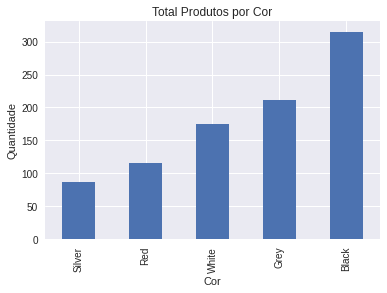

In [11]:
# show the table in a graphic 
df.groupby("Cor")["Quantidade"].count().sort_values(ascending=True).plot.bar(title="Total Produtos por Cor")
plt.xlabel("Cor")
plt.ylabel("Quantidade");


In [12]:
# group by the product
df2 = df.pivot_table(df, index=['Data Venda','ID Cliente','Produto']).sort_values(by='ID Produto')
df2['ID Produto'].groupby('Produto').count()

Produto
Adventure Works Laptop15.4W M1548 Black            123
Adventure Works Laptop15.4W M1548 Red              115
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         89
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          94
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         90
Fabrikam Trendsetter 2/3'' 17mm X100 Black         103
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          118
Headphone Adapter for Contoso Phone E130 Silver     87
Headphone Adapter for Contoso Phone E130 White      85
Name: ID Produto, dtype: int64

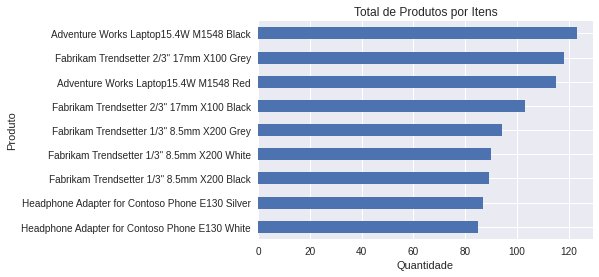

In [13]:
# show the table in a graphic 
df2.groupby("Produto")["Quantidade"].count().sort_values(ascending=True).plot.barh(title="Total de Produtos por Itens")
plt.xlabel("Quantidade")
plt.ylabel("Produto");

In [14]:
# group by id loja 
df_groupby_id_loja = df.groupby('ID Loja')['ID Produto'].count()
df_groupby_id_loja

ID Loja
199    307
306    278
307    319
Name: ID Produto, dtype: int64

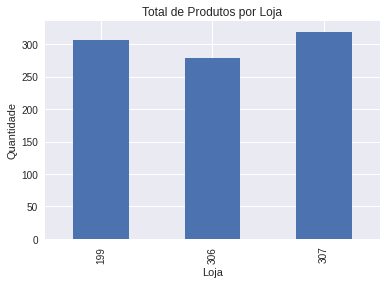

In [15]:
# show the table in a graphic 
df_groupby_id_loja.plot.bar(title="Total de Produtos por Loja")
plt.xlabel("Loja")
plt.ylabel("Quantidade");

In [140]:
df_loja199= df[df['ID Loja']==199]


In [141]:
df_loja199.to_csv("df_loja199.csv", index=False)

In [142]:
df_loja199.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      307 non-null    datetime64[ns]
 1   Data Envio      307 non-null    datetime64[ns]
 2   ID Loja         307 non-null    int64         
 3   ID Produto      307 non-null    int64         
 4   ID Cliente      307 non-null    int64         
 5   No. Venda       307 non-null    object        
 6   Custo Unitário  307 non-null    float64       
 7   Preço Unitário  307 non-null    float64       
 8   Quantidade      307 non-null    int64         
 9   Valor Desconto  307 non-null    float64       
 10  Valor Venda     307 non-null    float64       
 11  Produto         307 non-null    object        
 12  Fabricante      307 non-null    object        
 13  Marca           307 non-null    object        
 14  Classe          307 non-null    object        
 15  Cor   

In [143]:
df_loja199.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,307.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,199.0,1259.198697,18911.117264,268.572769,740.574560,65.534202,689.288593,7104.573590
std,0.0,701.758144,67.364334,131.711119,376.500068,144.606593,966.743059,4766.299157
min,199.0,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.0,1155.000000,18849.500000,324.690000,758.000000,6.000000,0.000000,4548.000000
50%,199.0,1202.000000,18898.000000,330.660000,980.000000,9.000000,294.000000,5880.000000
75%,199.0,1226.000000,18967.000000,330.990000,998.000000,18.000000,909.600000,9520.650000
max,199.0,2497.000000,19034.000000,348.580000,999.000000,1173.000000,6272.000000,29400.000000


In [144]:
df_loja199.columns


Index(['Data Venda', 'Data Envio', 'ID Loja', 'ID Produto', 'ID Cliente',
       'No. Venda', 'Custo Unitário', 'Preço Unitário', 'Quantidade',
       'Valor Desconto', 'Valor Venda', 'Produto', 'Fabricante', 'Marca',
       'Classe', 'Cor'],
      dtype='object')

In [145]:
df_loja199 = df_loja199.pivot_table(df[['Preço Unitário', 'Quantidade','Valor Desconto', 'Valor Venda']],
                                    index=['ID Loja','ID Cliente','Data Envio','Produto']).sort_values(by='Data Envio')
df_loja199.head(30)

Preço Unitário  ...  Valor Venda
ID Loja ID Cliente Data Envio Produto                                                      ...             
199     18815      2008-01-26 Adventure Works Laptop15.4W M1548 Red                 758.0  ...     10801.50
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...      9490.50
        18816      2008-01-28 Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...      4655.00
                   2008-01-30 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey            998.0  ...      4740.50
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...      4655.00
                   2008-02-01 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...      5694.30
                   2008-02-02 Adventure Works Laptop15.4W M1548 Red                 758.0  ...      3600.50
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...      5694.30
        18819      2008-02-17 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...     10439.55
                   2008-02-18 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey            998.0  ...      4740.50
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...     10429.10
                   2008-02-19 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...     10439.55
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      4655.00
                   2008-02-20 Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      4740.50
                   2008-02-21 Adventure Works Laptop15.4W M1548 Black               758.0  ...     12241.70
                              Adventure Works Laptop15.4W M1548 Red                 758.0  ...      4320.60
        18822      2008-03-01 Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      5586.00
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      5688.60
        18823      2008-03-03 Adventure Works Laptop15.4W M1548 Red                 758.0  ...      3600.50
                   2008-03-05 Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      5586.00
                   2008-03-06 Adventure Works Laptop15.4W M1548 Black               758.0  ...      4320.60
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      4655.00
        18824      2008-03-14 Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      4740.50
                   2008-03-15 Adventure Works Laptop15.4W M1548 Red                 758.0  ...      1440.20
        18825      2008-03-16 Adventure Works Laptop15.4W M1548 Red                 758.0  ...      5040.70
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      4740.50
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      5586.00
                   2008-03-18 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...      9490.50
                   2008-03-20 Adventure Works Laptop15.4W M1548 Black               758.0  ...      7921.10
                   2008-03-21 Adventure Works Laptop15.4W M1548 Black               758.0  ...      3600.50

[30 rows x 4 columns]

In [146]:
df_loja199.groupby(['Produto']).cumsum()

Preço Unitário  ...  Valor Venda
ID Loja ID Cliente Data Envio Produto                                                          ...             
199     18815      2008-01-26 Adventure Works Laptop15.4W M1548 Red                    758.00  ...    10801.500
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 Black              999.00  ...     9490.500
        18816      2008-01-28 Fabrikam Trendsetter 2/3'' 17mm X100 Grey                980.00  ...     4655.000
                   2008-01-30 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey               998.00  ...     4740.500
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey               1960.00  ...     9310.000
...                                                                                       ...  ...          ...
        19033      2010-01-01 Headphone Adapter for Contoso Phone E130 Silver          239.76  ...    66685.248
        19034      2010-01-02 Adventure Works Laptop15.4W M1548 Red                  25014.00  ...   215272.000
                              Headphone Adapter for Contoso Phone E130 Silver          249.75  ...    68795.136
                   2010-01-03 Fabrikam Trendsetter 2/3'' 17mm X100 Grey              40180.00  ...   360689.000
                   2010-01-04 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey             34930.00  ...   293811.200

[307 rows x 4 columns]

In [148]:
df_loja306= df[df['ID Loja']==306]

In [149]:
df_loja306.to_csv("df_loja306.csv", index=False)

In [150]:
df_loja306 = df_loja306.pivot_table(df[['Preço Unitário',
      'Quantidade', 'Valor Desconto', 'Valor Venda']], index=['ID Loja','ID Cliente','Data Envio','Produto']).sort_values(by='Data Envio')
df_loja306.head(20)

Preço Unitário  ...  Valor Venda
ID Loja ID Cliente Data Envio Produto                                                      ...             
306     19046      2008-01-12 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black           999.0  ...      9590.40
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      6272.00
                   2008-01-14 Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      6387.20
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      3136.00
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...      4704.00
                   2008-01-15 Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      6387.20
                   2008-01-16 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey            998.0  ...      3193.60
                   2008-01-22 Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...      7840.00
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...      3136.00
        19047      2008-01-27 Adventure Works Laptop15.4W M1548 Black               758.0  ...      2425.60
                   2008-02-01 Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...      7840.00
                   2008-02-10 Adventure Works Laptop15.4W M1548 Black               758.0  ...      3638.40
                   2008-02-11 Fabrikam Trendsetter 1/3'' 8.5mm X200 White           998.0  ...      9580.80
                   2008-02-12 Adventure Works Laptop15.4W M1548 Red                 758.0  ...      5639.52
                   2008-02-17 Adventure Works Laptop15.4W M1548 Black               758.0  ...      4229.64
                   2008-02-19 Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...      5468.40
                              Adventure Works Laptop15.4W M1548 Red                 758.0  ...      5639.52
        19049      2008-03-16 Fabrikam Trendsetter 2/3'' 17mm X100 Black            980.0  ...     20050.80
                   2008-03-18 Adventure Works Laptop15.4W M1548 Black               758.0  ...      5639.52
                   2008-03-19 Fabrikam Trendsetter 2/3'' 17mm X100 Grey             980.0  ...     10936.80

[20 rows x 4 columns]

In [151]:
df_loja307= df[df['ID Loja'].isin([307])]

In [152]:
df_loja307.to_csv("df_loja307.csv", index=False)

In [153]:
df_loja307 = df_loja307.pivot_table(df[['Preço Unitário',
     'Quantidade', 'Valor Desconto', 'Valor Venda']], index=['ID Loja','ID Cliente','Data Envio','Produto']).sort_values(by='Data Envio')
df_loja307.head(30)

Preço Unitário  ...  Valor Venda
ID Loja ID Cliente Data Envio Produto                                                         ...             
307     19094      2008-02-12 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...    12544.000
                   2008-02-15 Adventure Works Laptop15.4W M1548 Black                 758.00  ...     3638.400
                   2008-02-17 Adventure Works Laptop15.4W M1548 Black                 758.00  ...     6064.000
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 Black             999.00  ...     8791.200
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     4704.000
                   2008-02-19 Adventure Works Laptop15.4W M1548 Black                 758.00  ...     3638.400
                              Adventure Works Laptop15.4W M1548 Red                   758.00  ...     6670.400
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     8624.000
                   2008-02-20 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     3920.000
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black              980.00  ...     7840.000
                              Adventure Works Laptop15.4W M1548 Red                   758.00  ...     9096.000
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 Black             999.00  ...     7992.000
                   2008-02-21 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey              998.00  ...     3992.000
                   2008-02-22 Adventure Works Laptop15.4W M1548 Black                 758.00  ...     3032.000
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black              980.00  ...     3920.000
                   2008-02-24 Adventure Works Laptop15.4W M1548 Red                   758.00  ...     3032.000
                              Fabrikam Trendsetter 2/3'' 17mm X100 Black              980.00  ...     8624.000
                   2008-02-26 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey              998.00  ...     4790.400
                              Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     4704.000
                   2008-02-27 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     3920.000
                   2008-03-05 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black             999.00  ...     7992.000
                   2008-03-07 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     3920.000
        19097      2008-04-26 Adventure Works Laptop15.4W M1548 Red                   758.00  ...     3032.000
                   2008-05-04 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     4704.000
                   2008-05-05 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     7840.000
                   2008-05-11 Fabrikam Trendsetter 2/3'' 17mm X100 Grey               980.00  ...     8624.000
        19099      2008-06-03 Headphone Adapter for Contoso Phone E130 White            9.99  ...     1294.704
                   2008-06-04 Adventure Works Laptop15.4W M1548 Red                   758.00  ...     5457.600
                              Fabrikam Trendsetter 1/3'' 8.5mm X200 Black             999.00  ...     7192.800
                   2008-06-08 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black             999.00  ...     7192.800

[30 rows x 4 columns]